In [1]:
import pandas as pd

# Anti Join

In [3]:
employees = pd.read_csv("data/employees.csv")
top_cust = pd.read_csv("data/top_cust.csv")

In [4]:
employees.head()

,srid,lname,fname,title hire_date,email
0,1,Adams,Andrew,General Manager 2002-08-14,andrew@chinookcorp.com
1,2,Edwards,cy,Sales Manager 2002-05-01,cy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent 2003-05-03,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent 2003-10-17,steve@chinookcorp.com


In [6]:
top_cust.head()

,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


In [7]:
empl_cust = employees.merge(right=top_cust, how="left", on="srid")
empl_cust.head()

,srid,lname_x,fname_x,title hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y
0,1,Adams,Andrew,General Manager 2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Edwards,cy,Sales Manager 2002-05-01,cy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
3,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
4,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br


In [8]:
empl_cust = employees.merge(right=top_cust, how="left", on="srid", indicator=True)
empl_cust.head()

,srid,lname_x,fname_x,title hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager 2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,cy,Sales Manager 2002-05-01,cy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


In [14]:
srid_list = empl_cust.loc[empl_cust["_merge"] == "left_only", "srid"]
srid_list

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

In [15]:
employees[employees["srid"].isin(srid_list)]

,srid,lname,fname,title hire_date,email
0,1,Adams,Andrew,General Manager 2002-08-14,andrew@chinookcorp.com
1,2,Edwards,cy,Sales Manager 2002-05-01,cy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager 2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff 2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff 2004-03-04,laura@chinookcorp.com


# Semi Join

In [16]:
non_mus_tcks = pd.read_csv('data/non_mus_tcks.csv')
top_invoices = pd.read_csv('data/top_invoices.csv')
genres = pd.read_csv('data/genres.csv')

In [17]:
non_mus_tcks.head()

,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,2823,Collaborators,227,3,19,1.99
4,2824,Torn,227,3,19,1.99


In [18]:
top_invoices.head()

,ilid,iid,tid,uprice,quantity
0,470,88,2832,1.99,1
1,473,88,2850,1.99,1
2,476,88,2868,1.99,1
3,527,96,3214,1.99,1
4,528,96,3223,1.99,1


In [19]:
genres.head()

,gid
0,1
1,2
2,3
3,4
4,5


In [20]:
tracks_invoices = non_mus_tcks.merge(right=top_invoices, on="tid", how="inner")
tracks_invoices.head()

,tid,name,aid,mtid,gid,u_price,ilid,iid,uprice,quantity
0,2850,The Fix,228,3,21,1.99,473,88,1.99,1
1,2850,The Fix,228,3,21,1.99,2192,404,1.99,1
2,2868,Walkabout,230,3,19,1.99,476,88,1.99,1
3,2868,Walkabout,230,3,19,1.99,2194,404,1.99,1
4,3177,Hot Girl,249,3,19,1.99,1668,306,1.99,1


In [23]:
top_tracks = non_mus_tcks[non_mus_tcks["tid"].isin(tracks_invoices["tid"])]

top_tracks.head()

,tid,name,aid,mtid,gid,u_price
18,2850,The Fix,228,3,21,1.99
36,2868,Walkabout,230,3,19,1.99
106,3177,Hot Girl,249,3,19,1.99
129,3200,Gay Witch Hunt,251,3,19,1.99
143,3214,Phyllis\'s Wedding,251,3,22,1.99


In [25]:
cnt_by_gid = top_tracks.groupby("gid").agg({"tid":"count"})
cnt_by_gid

,tid
gid,
19,4
21,2
22,1


In [27]:
cnt_by_gid = top_tracks.groupby(["gid"], as_index=False).agg({"tid":"count"})
cnt_by_gid

,gid,tid
0,19,4
1,21,2
2,22,1


In [28]:
cnt_by_gid.merge(right=genres, on="gid")

,gid,tid
0,19,4
1,21,2
2,22,1


# Concat Basics

In [31]:
tracks_master = pd.read_csv("data/tracks_master.csv")
tracks_ride = pd.read_csv("data/tracks_ride.csv")
tracks_st = pd.read_csv("data/tracks_st.csv")

In [32]:
tracks_master.head()

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99
3,1885,Dirty Window,155,1,3,0.99
4,1886,Invisible Kid,155,1,3,0.90


In [33]:
tracks_ride.head()

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99
3,1877,Fade To Black,154,1,3,0.99
4,1878,Trapped Under Ice,154,1,3,0.99


In [35]:
tracks_st.head()

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99
3,1885,Dirty Window,155,1,3,0.99
4,1886,Invisible Kid,155,1,3,0.99


In [39]:
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99
2,155,3,1,Some Kind Of Monster,1884,0.99
3,155,3,1,Dirty Window,1885,0.99
4,155,3,1,Invisible Kid,1886,0.90
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99


In [40]:
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True, ignore_index=True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99
2,155,3,1,Some Kind Of Monster,1884,0.99
3,155,3,1,Dirty Window,1885,0.99
4,155,3,1,Invisible Kid,1886,0.90
5,154,3,1,Fight Fire With Fire,1874,0.99
6,154,3,1,Ride The Lightning,1875,0.99
7,154,3,1,For Whom The Bell Tolls,1876,0.99
8,154,3,1,Fade To Black,1877,0.99
9,154,3,1,Trapped Under Ice,1878,0.99


In [42]:
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], join="inner", sort=True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99
2,155,3,1,Some Kind Of Monster,1884,0.99
3,155,3,1,Dirty Window,1885,0.99
4,155,3,1,Invisible Kid,1886,0.90
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99


# Concatenating with keys

In [46]:
inv_jul = pd.read_csv('data/inv_jul.csv')
inv_aug = pd.read_csv('data/inv_aug.csv')
inv_sep = pd.read_csv('data/inv_sep.csv')

In [47]:
inv_jul.head()

,iid,cid,invoice_date,total,bill_ctry
0,42,51,40000,1.98,Sweden
1,43,53,40000,1.98,UK
2,44,55,40001,3.96,Australia
3,45,59,40002,5.94,India
4,46,6,40005,8.91,Czech Republic


In [48]:
inv_aug.head()

,iid,cid,invoice_date,total,bill_ctry
0,49,30,40031,1.98,Canada
1,50,32,40031,1.98,Canada
2,51,34,40032,3.96,Portugal
3,52,38,40033,5.94,Germany
4,53,44,40036,8.91,Finland


In [49]:
inv_sep.head()

,iid,cid,invoice_date,total,bill_ctry
0,56,9,40062,1.98,Denmark
1,57,11,40062,1.98,Brazil
2,58,13,40063,3.96,Brazil
3,59,17,40064,5.94,USA
4,60,23,40067,8.91,USA


In [52]:
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], keys=["7jul", "8aug", "9sep"])
inv_jul_thr_sep

iid  cid  invoice_date  total       bill_ctry
7jul 0    42   51         40000   1.98          Sweden
     1    43   53         40000   1.98              UK
     2    44   55         40001   3.96       Australia
     3    45   59         40002   5.94           India
     4    46    6         40005   8.91  Czech Republic
...      ...  ...           ...    ...             ...
9sep 28  387   29         41520   3.96          Canada
     29  388   33         41521   5.94          Canada
     30  389   39         41524   8.91          France
     31  390   48         41529  13.86     Netherlands
     32  391    3         41537   0.99          Canada

[103 rows x 5 columns]

In [58]:
avg_inv_by_month = inv_jul_thr_sep.groupby("invoice_date").agg({"total":"mean"})
avg_inv_by_month

,total
invoice_date,
40000,1.98
40001,3.96
40002,5.94
40005,8.91
40010,13.86
...,...
41520,3.96
41521,5.94
41524,8.91


In [59]:
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({"total":"mean"})
avg_inv_by_month

,total
7jul,5.431429
8aug,5.660000
9sep,5.945455


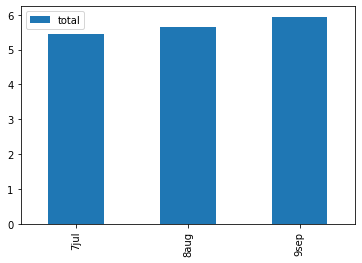

In [60]:
import matplotlib.pyplot as plt

avg_inv_by_month.plot(kind='bar')
plt.show()

# Append Method

In [61]:
inv_jul = pd.read_csv('data/inv_jul.csv')
inv_aug = pd.read_csv('data/inv_aug.csv')
inv_sep = pd.read_csv('data/inv_sep.csv')
invoice_items = pd.read_csv('data/invoice_items.csv')

In [62]:
invoice_items.head()

,ilid,iid,tid,uprice,quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


In [63]:
inv_jul.head()

,iid,cid,invoice_date,total,bill_ctry
0,42,51,40000,1.98,Sweden
1,43,53,40000,1.98,UK
2,44,55,40001,3.96,Australia
3,45,59,40002,5.94,India
4,46,6,40005,8.91,Czech Republic


In [66]:
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)
metallica_tracks.head()

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99
3,1877,Fade To Black,154,1,3,0.99
4,1878,Trapped Under Ice,154,1,3,0.99


In [69]:
tracks_invoices = metallica_tracks.merge(right=invoice_items, on="tid", how="inner")
tracks_invoices.head()

,tid,name,aid,mtid,gid,u_price,ilid,iid,uprice,quantity
0,1875,Ride The Lightning,154,1,3,0.99,887,165,0.99,1
1,1876,For Whom The Bell Tolls,154,1,3,0.99,312,59,0.99,1
2,1876,For Whom The Bell Tolls,154,1,3,0.99,1461,270,0.99,1
3,1877,Fade To Black,154,1,3,0.99,2035,375,0.99,1
4,1882,Frantic,155,1,3,0.99,1462,270,0.99,1


In [70]:
tracks_sold = tracks_invoices.groupby(["tid", "name"]).agg({"quantity":"sum"})
tracks_sold

,,quantity
tid,name,
1875,Ride The Lightning,1
1876,For Whom The Bell Tolls,2
1877,Fade To Black,1
1882,Frantic,2
1884,Some Kind Of Monster,2
1886,Invisible Kid,2


In [71]:
tracks_sold.sort_values(by="quantity", ascending=False)

,,quantity
tid,name,
1876,For Whom The Bell Tolls,2
1882,Frantic,2
1884,Some Kind Of Monster,2
1886,Invisible Kid,2
1875,Ride The Lightning,1
1877,Fade To Black,1


# Concatenate and merge 

In [72]:
classic_18 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRGKVF7aP5rJvJX4SzQpU1io--bQ8aa8DPn9i34nSrTr5uHGlCNwxpO3UxCW-1hW6NwgZeC-TgvdRg5/pub?gid=728027621&single=true&output=csv')

classic_19 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRGKVF7aP5rJvJX4SzQpU1io--bQ8aa8DPn9i34nSrTr5uHGlCNwxpO3UxCW-1hW6NwgZeC-TgvdRg5/pub?gid=1451981&single=true&output=csv')

pop_18 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRGKVF7aP5rJvJX4SzQpU1io--bQ8aa8DPn9i34nSrTr5uHGlCNwxpO3UxCW-1hW6NwgZeC-TgvdRg5/pub?gid=813843167&single=true&output=csv')

pop_19 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=0&single=true&output=csv')

In [73]:
classic_18.head()

,pid,tid
0,12,3483
1,12,3416
2,12,3489
3,12,3479
4,12,3440


In [74]:
pop_18.head()

,pid,tid
0,1,3063
1,1,2712
2,1,2641
3,1,2271
4,1,919


In [75]:
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

In [76]:
classic_18_19.head()

,pid,tid
0,12,3483
1,12,3416
2,12,3489
3,12,3479
4,12,3440


In [77]:
pop_18_19

,pid,tid
0,1,3063
1,1,2712
2,1,2641
3,1,2271
4,1,919
...,...,...
371,1,2942
372,1,2463
373,1,2459
374,1,1540


In [78]:
classic_pop = classic_18_19.merge(right=pop_18_19, how='inner', on="tid")
classic_pop.head()

,pid_x,tid,pid_y
0,12,3479,1
1,12,3439,1
2,12,3445,1
3,12,3449,1
4,12,3437,1


In [80]:
popular_classic = classic_18_19[classic_18_19["tid"].isin(classic_pop["tid"])]
popular_classic

,pid,tid
3,12,3479
10,12,3439
21,12,3445
23,12,3449
48,12,3437
50,12,3435
